In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/daniel-dc-cd/data_science/master/module_4_ML/data/seattle_weather_1948-2017.csv')

numrows = 25549 # can be as large as 25549

#create an empty dataframe to hold values
tree_df = pd.DataFrame({'today':[0.0] * numrows,
                             'tomorrow':[True] * numrows}) #initalize as boolean

#sort columns for convience
seq = ['today',
       'tomorrow']

tree_df = tree_df.reindex(columns=seq)


In [37]:
#populate the regression data frame with values from the pandas dataframe
for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    tree_df.iat[i,1] = tomorrow
    tree_df.iat[i,0] = today

tree_df = tree_df.dropna() #exclude any rows with missing data

In [38]:
tree_df.head()

,today,tomorrow
0,0.00,True
1,0.47,True
2,0.59,True
3,0.42,True
4,0.31,True


In [39]:
from sklearn import tree
#modify the data to work with this model
x = tree_df.today.values
y = tree_df.tomorrow.values
x = x.reshape(tree_df.shape[0], 1)
#note that we did not need to reshape the y values as we did with linear regression

In [40]:
clf = tree.DecisionTreeClassifier(criterion = "entropy").fit(x, y)

In [41]:
#calaculate accuary
score = clf.score(x,y)
print(score)

0.7129883347686526


In [42]:
from sklearn import metrics
pred = clf.predict(x)
cm = metrics.confusion_matrix(y, pred)
print(cm)

[[11461  3183]
 [ 4149  6753]]


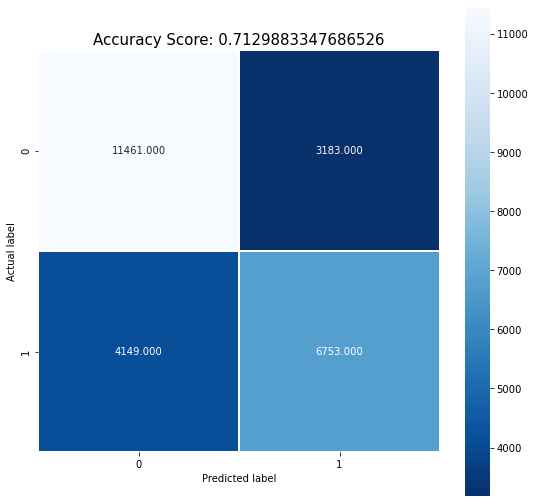

In [51]:
#Here is a bit nicer matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [52]:
dotfile = open("dt.dot", "w")
tree.export_graphviz(clf, out_file=dotfile)
dotfile.close()